In [5]:
pip install opendatasets --upgrade --quiet

In [6]:
import opendatasets as od

In [7]:
data_filename = '/content/US_Accidents_Dec20_updated.csv'

In [8]:
import pandas as pd
df = pd.read_csv(data_filename)
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.101480,-84.523410,39.098410,-84.522410,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978601,A-3701928,2,2020-01-25 11:25:00,2020-01-25 12:15:59,33.936231,-117.118826,33.936231,-117.118826,0.000,At Gilman Springs Rd - Accident.,NaN,CA-60 W,R,Redlands,Riverside,CA,92373,US,US/Pacific,KSBD,2020-01-25 11:50:00,75.0,75.0,21.0,28.80,10.0,CALM,0.0,0.00,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
978602,A-3701929,2,2020-01-25 11:20:00,2020-01-25 11:54:00,33.957894,-118.111628,33.957894,-118.111628,0.000,At CA-19/Lakewood Blvd/Exit 125 - Accident.,NaN,I-5 N,R,Downey,Los Angeles,CA,90240,US,US/Pacific,KCQT,2020-01-25 10:52:00,64.0,64.0,58.0,29.86,5.0,CALM,0.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
978603,A-3701930,2,2020-01-25 11:25:00,2020-01-25 12:17:59,33.374304,-117.079400,33.374304,-117.079400,0.000,At CA-79 - Accident.,36367.0,Pala Temecula Rd,R,Pala,San Diego,CA,92059-2406,US,US/Pacific,KF70,2020-01-25 11:15:00,66.0,66.0,35.0,28.63,10.0,NNE,3.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
978604,A-3701931,2,2020-01-25 11:34:00,2020-01-25 12:07:00,33.458906,-117.655867,33.458906,-117.655867,0.000,At Camino De Estrella/Exit 78 - Accident.,NaN,I-5 N,R,San Clemente,Orange,CA,92672,US,US/Pacific,KNXF,2020-01-25 11:55:00,64.0,64.0,63.0,29.96,10.0,SSW,7.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978606 entries, 0 to 978605
Data columns (total 47 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     978606 non-null  object 
 1   Severity               978606 non-null  int64  
 2   Start_Time             978606 non-null  object 
 3   End_Time               978606 non-null  object 
 4   Start_Lat              978606 non-null  float64
 5   Start_Lng              978605 non-null  float64
 6   End_Lat                978605 non-null  float64
 7   End_Lng                978605 non-null  float64
 8   Distance(mi)           978605 non-null  float64
 9   Description            978605 non-null  object 
 10  Number                 342602 non-null  float64
 11  Street                 978605 non-null  object 
 12  Side                   978605 non-null  object 
 13  City                   978538 non-null  object 
 14  County                 978605 non-nu

In [10]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,978606.000000,978606.000000,978605.000000,978605.000000,978605.000000,978605.000000,342602.000000,950017.000000,746686.000000,948129.000000,954897.000000,949621.000000,912983.000000,725419.000000
mean,2.166738,36.364919,-96.273706,36.365055,-96.273480,0.618077,7622.951299,59.874002,56.031417,65.463117,29.534011,9.139276,7.547819,0.007535
std,0.551786,5.199080,18.144330,5.199168,18.144099,1.622111,15178.320411,17.735574,20.040563,22.951626,0.965125,2.682246,5.814640,0.119508
min,1.000000,24.570584,-124.497470,24.574326,-124.497470,0.000000,1.000000,-89.000000,-89.000000,2.000000,0.020000,0.000000,0.000000,0.000000
25%,2.000000,33.594850,-117.866006,33.594990,-117.867487,0.007000,1144.250000,48.000000,42.400000,49.000000,29.360000,10.000000,3.500000,0.000000
50%,2.000000,36.191387,-90.089620,36.191973,-90.088380,0.171000,3687.000000,61.000000,58.000000,69.000000,29.850000,10.000000,7.000000,0.000000
75%,2.000000,40.172330,-80.324570,40.173447,-80.324871,0.631000,9001.000000,73.000000,71.000000,85.000000,30.020000,10.000000,10.400000,0.000000
max,4.000000,49.000580,-67.113167,49.075000,-67.109242,155.186000,961005.000000,129.200000,113.000000,100.000000,58.040000,120.000000,984.000000,24.000000


In [11]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

In [12]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

Number                   0.649908
Precipitation(in)        0.258722
Wind_Chill(F)            0.236990
Wind_Speed(mph)          0.067058
Humidity(%)              0.031143
Visibility(mi)           0.029619
Wind_Direction           0.029380
Temperature(F)           0.029214
Weather_Condition        0.029100
Pressure(in)             0.024227
Weather_Timestamp        0.020973
Airport_Code             0.002530
Timezone                 0.001023
Zipcode                  0.000445
City                     0.000069
Nautical_Twilight        0.000069
Astronomical_Twilight    0.000069
Civil_Twilight           0.000069
Sunrise_Sunset           0.000069
Amenity                  0.000001
Turning_Loop             0.000001
Start_Lng                0.000001
End_Lat                  0.000001
End_Lng                  0.000001
Distance(mi)             0.000001
Description              0.000001
Street                   0.000001
Side                     0.000001
Bump                     0.000001
State         

In [13]:
type(missing_percentages)

pandas.core.series.Series

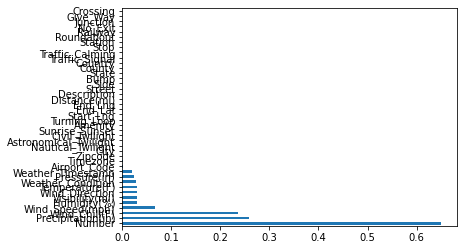

In [14]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

Exploratory Analysis and Visualization
Columns we'll analyze:

City
Start Time
Start Lat, Start Lng
Temperature
Weather Condition

In [15]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

City

In [16]:
df.City

0               Dublin
1               Dayton
2           Cincinnati
3           Cincinnati
4                Akron
              ...     
978601        Redlands
978602          Downey
978603            Pala
978604    San Clemente
978605             NaN
Name: City, Length: 978606, dtype: object

In [17]:
cities = df.City.unique()
len(cities)

9481

In [18]:
cities_by_accident = df.City.value_counts()
cities_by_accident

Miami              30591
Los Angeles        22925
Charlotte          18708
Houston            14235
Dallas             14011
                   ...  
Byrnedale              1
Limerick               1
Marion Junction        1
Babb                   1
Ettrick                1
Name: City, Length: 9480, dtype: int64

In [19]:
cities_by_accident[:20]

Miami          30591
Los Angeles    22925
Charlotte      18708
Houston        14235
Dallas         14011
Orlando        12799
Sacramento     10772
Raleigh         8265
San Diego       7915
Minneapolis     7871
Richmond        6953
Phoenix         6947
Nashville       6858
Baton Rouge     6611
Tucson          6600
Saint Paul      6251
Atlanta         6231
Austin          6231
New Orleans     6001
Portland        5984
Name: City, dtype: int64

In [20]:
type(cities_by_accident)

pandas.core.series.Series

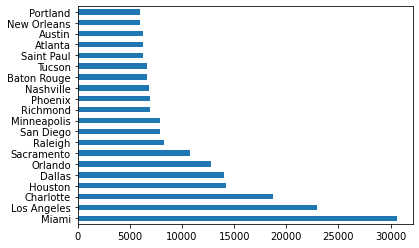

In [21]:
cities_by_accident[:20].plot(kind='barh')

In [22]:
import seaborn as sns
sns.set_style("darkgrid")

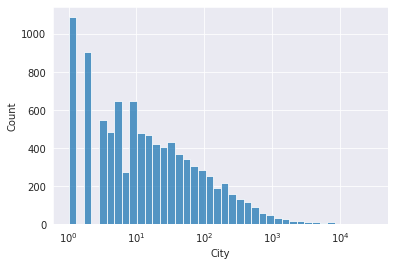

In [23]:
sns.histplot(cities_by_accident, log_scale=True)

In [24]:
cities_by_accident[cities_by_accident == 1]

Krotz Springs      1
Lodgepole          1
Morrice            1
Nolensville        1
San Elizario       1
                  ..
Byrnedale          1
Limerick           1
Marion Junction    1
Babb               1
Ettrick            1
Name: City, Length: 1089, dtype: int64

Start Time

In [25]:
df.Start_Time

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:15:39
4         2016-02-08 06:51:45
                 ...         
978601    2020-01-25 11:25:00
978602    2020-01-25 11:20:00
978603    2020-01-25 11:25:00
978604    2020-01-25 11:34:00
978605    2020-01-25 11:28:00
Name: Start_Time, Length: 978606, dtype: object

In [26]:
df.Start_Time = pd.to_datetime(df.Start_Time)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


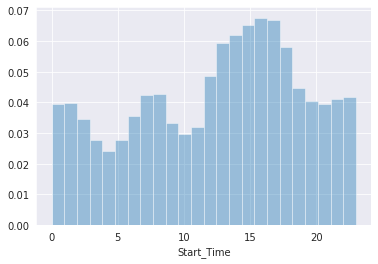

In [27]:
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


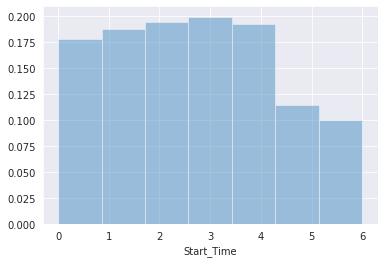

In [28]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


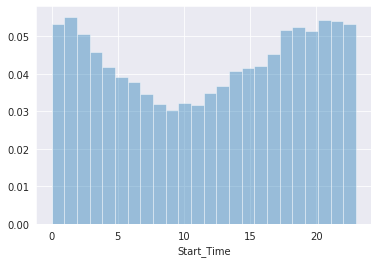

In [29]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


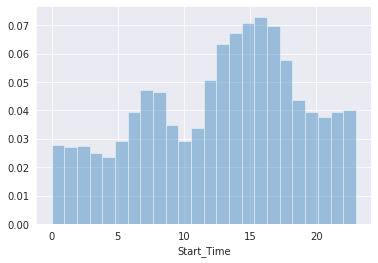

In [30]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

Start Latitude & Longitude

In [34]:
df.Start_Lat

0         40.108910
1         39.865420
2         39.102660
3         39.101480
4         41.062130
            ...    
978601    33.936231
978602    33.957894
978603    33.374304
978604    33.458906
978605    33.800000
Name: Start_Lat, Length: 978606, dtype: float64

In [35]:
df.Start_Lng

0         -83.092860
1         -84.062800
2         -84.524680
3         -84.523410
4         -81.537840
             ...    
978601   -117.118826
978602   -118.111628
978603   -117.079400
978604   -117.655867
978605           NaN
Name: Start_Lng, Length: 978606, dtype: float64

In [36]:
sample_df = df.sample(int(0.1 * len(df)))

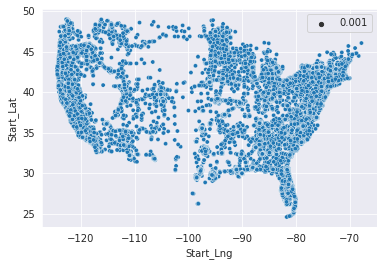

In [37]:
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

In [38]:
import folium

In [39]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(40.108909999999995, -83.09286)

In [40]:
for x in df[['Start_Lat', 'Start_Lng']].sample(100).iteritems():
    print(x[1])

659728    37.556129
233678    43.044477
372256    30.382379
136658    47.734050
512171    44.966021
            ...    
926443    40.774460
201748    39.932619
6215      33.912940
217433    33.579430
6193      34.165280
Name: Start_Lat, Length: 100, dtype: float64
659728   -122.298592
233678    -87.926254
372256    -84.566584
136658   -122.324496
512171    -93.265653
             ...    
926443    -73.670990
201748    -82.830077
6215     -118.129780
217433    -86.710120
6193     -118.489860
Name: Start_Lng, Length: 100, dtype: float64


In [41]:
zip(list(df.Start_Lat), list(df.Start_Lng))

In [42]:
from folium.plugins import HeatMap

In [45]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map